<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

## <center><h1> EXAMEN PARCIAL PYTHON</h2></center>
    
## <center><h2 style="color:black; background-color:orange;">GBI6-2022I - BIOINFORMÁTICA</h1></center>


**Chávez Carranza, Daniela Alejandra**

**05-08-2022**

### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
!pip install biopython

In [3]:
my_comput = pd.DataFrame({'Nombre del dispositivo' : pd.Categorical(["LAPTOP-86VEURON"]),
                          'Procesador' : pd.Categorical(["AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx 2.10 GHz"]),
                          'RAM instalada' : [8.0],
                          'Id. del dispositivo' : ["7EFB1258-A4D5-484E-A8E5-6DA244699DDB"],
                          'Tipo de sistema Sistema operativo' : ["64 bits"]})
my_comput

,Nombre del dispositivo,Procesador,RAM instalada,Id. del dispositivo,Tipo de sistema Sistema operativo
0,LAPTOP-86VEURON,AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx ...,8.0,7EFB1258-A4D5-484E-A8E5-6DA244699DDB,64 bits


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```science_plots```: la función debe 

- utilizar como argumento de entrada la data descargada por ```download_pubmed```
- ordenar los conteos de autores por país en orden ascedente y 
- seleccionar los cinco más abundantes. Con esta selección debe graficar un ```pie_plot```. Como guía para el conteo por países puede usar el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). 

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [5]:
# Escriba aquí su código para el ejercicio 1

# Importanto la libreria
import miningscience as msc

# Docstrings de las funciones del archivo 'miningscience.py' 
help(msc.download_pubmed)
help(msc.science_plots)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Permite buscar artículos científicos en pubmed con un filtrado mediante el uso de palabras claves

Help on function science_plots in module miningscience:

science_plots(archivo)
    Permite generar un diagrama de pastel de los países a los que pertenecen los autores que han realizado publicaciones sobre un tema en particular




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [8]:
# Escriba aquí su código para el ejercicio 2


import os
import re
w = msc.download_pubmed("monkey pox")
x = len (w)
print ('El número artículos para KEYWORD es: ',x)
with open ("Data/monkeypox.txt","w") as txt:
    txt.write(w)

El número artículos para KEYWORD es:  1854428


In [9]:
import os
import re
y = msc.download_pubmed("covid")
z = len (y)
print ('El número artículos para KEYWORD es: ',z)
with open ("Data/covid.txt","w") as txt:
    txt.write(y)

El número artículos para KEYWORD es:  2002252


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```science_plots``` para: 

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta ```img```

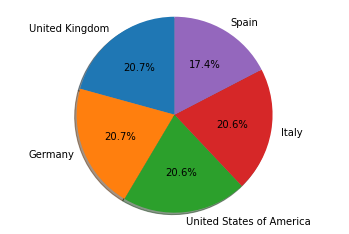

<Figure size 432x288 with 0 Axes>

In [11]:
# Escriba aquí su código para el ejercicio 3

monkeypox = msc.science_plots(w)
with open ("img/monkeypox.jpg","w") as jpg:
    monkeypox

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*
.


.

.

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [9]:
# Escriba aquí su código para el ejercicio 6

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt

with open("Data/glyceraldehyde-3-phosphate dehydrogenase .seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 15:
            ListID.append(line)
            a=a+1

Entrez.email = "A.N.Other@example.com" 
ofile=open('Data/Sequences.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')

ffile=open('Data/Sequences.fasta','w')
with open("Data/Sequences.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))

In [ ]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/Sequences.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/Sequences.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)

**Escriba aquí la interpretación del árbol**

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
